# Polynomial Linear Regression

In [17]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

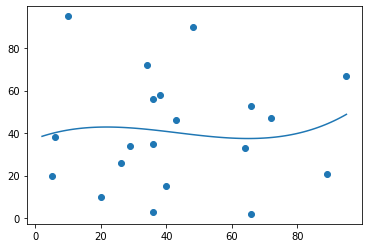

In [2]:
# Plot polynomial (bad fit)
x = [89,43,36,36,95,10,66,34,38,20,26,29,48,64,6,5,36,66,72,40]
y = [21,46,3,35,67,95,53,72,58,10,26,34,90,33,38,20,56,2,47,15]

mymodel = np.poly1d(np.polyfit(x, y, 3))
myline = np.linspace(2,95,100)
plt.scatter(x, y)
plt.plot(myline, mymodel(myline))
plt.show();

**Note**: We should not use polynomial when our graph looks like this. In this case we should other regression methods.

In [4]:
# R-squared for bad fit
from sklearn.metrics import r2_score

model = np.poly1d(np.polyfit(x,y,3))
print(r2_score(y, model(x)))

0.009952707566680652


R-squared is very low, which clearly represents the bad fit.

Let's see what's the ideal scenario to use polynomial.

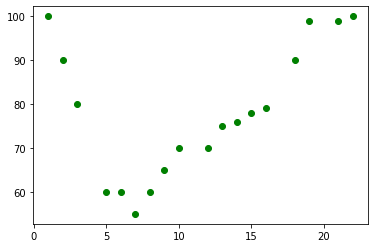

In [14]:
# Step 1: Data
x2 = [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]
y2 = [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]

plt.scatter(x2, y2, color='g')
plt.show()

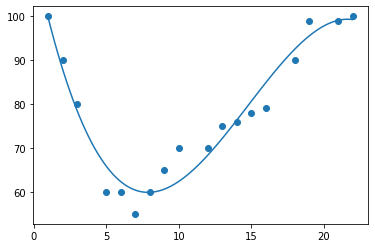

In [15]:
# Step 2: Draw the line (best fit)
mymodel = np.poly1d(np.polyfit(x2, y2, 3))
myline = np.linspace(1,22,100)
plt.scatter(x, y)
plt.plot(myline, mymodel(myline))
plt.show();

In [16]:
# Step 3: R-squared on best fit
model = np.poly1d(np.polyfit(x2,y2,3))
print(r2_score(y2, model(x2)))

0.9432150416451026


In [13]:
# Predictions
speed = model(18)
speed

92.48673749579996

## Hands on Example

Another important exercise

In [18]:
# Import data (from amazon s3 bucket)
df = pd.read_csv('https://s3.us-west-2.amazonaws.com/public.gamelab.fun/dataset/position_salaries.csv')
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [19]:
df.shape

(10, 3)

In [28]:
X = df.iloc[:,1:2].values
y = df.iloc[:,2].values

In [29]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [30]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

In [31]:
# Split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=0)

In [32]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8, 1), (2, 1), (8,), (2,))

In [33]:
# Fit linear regression to the dataset
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

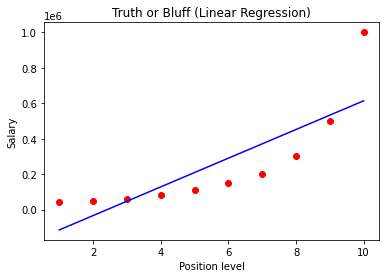

In [34]:
# Function to visualize linear regression results
def viz_linear():
    plt.scatter(X, y, color='red')
    plt.plot(X, lin_reg.predict(X), color='blue')
    plt.title('Truth or Bluff (Linear Regression)')
    plt.xlabel('Position level')
    plt.ylabel('Salary')
    plt.show()
    return
viz_linear()

In [37]:
# Fit polynomial regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

LinearRegression()

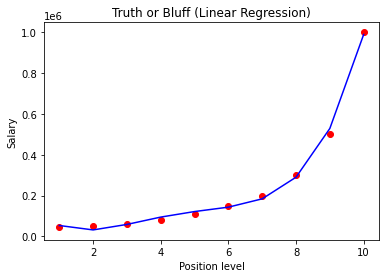

In [40]:
# Visualize the ploynomial regression (best fit)
def viz_linear():
    plt.scatter(X, y, color='red')
    plt.plot(X, pol_reg.predict(X_poly), color='blue')
    plt.title('Truth or Bluff (Linear Regression)')
    plt.xlabel('Position level')
    plt.ylabel('Salary')
    plt.show()
    return
viz_linear()

In [46]:
# Make predictions on linear regression model
pred_linear = lin_reg.predict([[11]])
pred_linear

array([694333.33333333])

In [52]:
# Make prediction on polynomial regression model
pred_poly = pol_reg.predict(poly_reg.fit_transform([[11]]))
pred_poly

array([1780833.33333284])

In [53]:
print(f'Linear Regression results = {pred_linear}')
print(f'Polynomial Regression results = {pred_poly}')
print(f'The difference is = {pred_linear - pred_poly}')

Linear Regression results = [694333.33333333]
Polynomial Regression results = [1780833.33333284]
The difference is = [-1086499.99999951]
